# Setup & Data Import

## Setup Global Configs and Import Libraries

In [ ]:
# SETUP & IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
from scipy import stats
import itertools
import re
from pandas.api.types import CategoricalDtype
import missingno as msno

# Display options for clarity
pd.set_option('display.width', 160)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda v: f"{v:,.4f}")

# Set visual themes
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.05)
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [92]:
# --- Define Paths ---
salary_path = Path('Salary_Data.csv')
survey_path = Path('survey_respondents_info.csv')
superstore_path = Path('Superstore 2023.csv')

# --- Validate File Existence ---
for path in [salary_path, survey_path, superstore_path]:
    if not path.exists():
        raise FileNotFoundError(f"❌ File not found: {path.resolve()}")

# --- Load with Delimiter Fallback ---
def load_csv_safely(path):
    try:
        return pd.read_csv(path, sep=',', engine='python')
    except Exception:
        print(f"⚠️ Failed with ',' — retrying with ';' for {path.name}...")
        return pd.read_csv(path, sep=';', engine='python')

# --- Load Both Datasets ---
salary_df = load_csv_safely(salary_path)
survey_df = load_csv_safely(survey_path)
superstore_df = load_csv_safely(superstore_path)

print(f"✅ Salary_Data loaded: {salary_df.shape[0]:,} rows × {salary_df.shape[1]} columns")
print(salary_df.info())
display(salary_df.head())

print(f"✅ Survey_Respondents_Info loaded: {survey_df.shape[0]:,} rows × {survey_df.shape[1]} columns")
print(survey_df.info())
display(survey_df.head())

print(f"✅ Superstore_Data loaded: {superstore_df.shape[0]:,} rows × {superstore_df.shape[1]} columns")
print(superstore_df.info())
display(superstore_df.head())

⚠️ Failed with ',' — retrying with ';' for survey_respondents_info.csv...
✅ Salary_Data loaded: 6,704 rows × 6 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0000,Male,Bachelor's,Software Engineer,5.0000,"90,000.0000"
1,28.0000,Female,Master's,Data Analyst,3.0000,"65,000.0000"
2,45.0000,Male,PhD,Senior Manager,15.0000,"150,000.0000"
3,36.0000,Female,Bachelor's,Sales Associate,7.0000,"60,000.0000"
4,52.0000,Male,Master's,Director,20.0000,"200,000.0000"


✅ Survey_Respondents_Info loaded: 11,761 rows × 20 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11761 entries, 0 to 11760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11761 non-null  int64  
 1   City              11761 non-null  object 
 2   Group_size        11746 non-null  float64
 3   Age               11752 non-null  float64
 4   MPI#Mean          8044 non-null   float64
 5   TOM               11761 non-null  object 
 6   BUMO              11761 non-null  object 
 7   BUMO_Previous     6096 non-null   object 
 8   MostFavourite     11761 non-null  object 
 9   Gender            11761 non-null  object 
 10  MPI#detail        8076 non-null   object 
 11  Age#group         11752 non-null  object 
 12  Age#Group#2       11752 non-null  object 
 13  MPI               8044 non-null   object 
 14  MPI#2             8044 non-null   object 
 15  Occupation        11761 non-

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#group,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use
0,348226,Cần Thơ,3.0000,29.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,"5,499.0000"
1,358485,Hà Nội,3.0000,25.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,"5,499.0000"
2,360729,Cần Thơ,3.0000,25.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,"5,499.0000"
3,360737,Cần Thơ,3.0000,24.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,20 - 24 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Skilled Labor (tailor, machinist, carpenter, e...",Blue Collar,2018,3,"5,499.0000"
4,361753,Cần Thơ,3.0000,26.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Semi-skilled labor (salesperson, waiter, photo...",Blue Collar,2018,3,"5,499.0000"


✅ Superstore_Data loaded: 9,994 rows × 21 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-nul

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.0000",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2020-152156,08/11/2022 00:00:00,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.0000",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0000,219.5820
2,3,CA-2020-138688,12/06/2022 00:00:00,16/06/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.0000",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0000,6.8714
3,4,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.0000",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.4500,-383.0310
4,5,US-2019-108966,11/10/2021 00:00:00,18/10/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.0000",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2000,2.5164


## Define Necessary Functions

In [93]:
# Function to split CamelCase while keeping acronyms intact
def split_camel_case_keep_acronyms(name):
    """
    Convert CamelCase to Snake_Case while keeping acronyms intact.
    
    Examples:
    - 'MostFavourite' -> 'Most_Favourite'
    - 'CustomerMPIValue' -> 'Customer_MPI_Value'
    - 'NPSScore' -> 'NPS_Score'
    """
    # Insert underscore between:
    #   1. a lowercase letter and uppercase letter (e.g., tM -> t_M)
    #   2. but NOT between consecutive uppercase letters (e.g., MPI stays MPI)
    return re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name)

In [94]:
# Create a function to check ID uniqueness
def check_id_uniqueness(df, id_column='id'):
    """
    Check if the specified ID column in a DataFrame contains unique values.
    Prints duplicate IDs and their counts if any are found.
    """

    """
    Steps:
    1. Count frequency of each ID.
    2. If all frequencies are 1, IDs are unique.
    3. If any frequency > 1, there are duplicate IDs.
    4. Print duplicate IDs with their counts.
    """
    # Check if the ID column exists
    if id_column not in df.columns:
        print(f"❌ Column '{id_column}' not found in DataFrame, try a correct column name.")
        return

    # Step 1: Count frequency of each ID
    id_counts = df[id_column].value_counts()

    # Step 2: Check if all IDs are unique
    if (id_counts == 1).all():
        print("✅ All IDs are unique.")
    else:
        print("❌ Duplicate IDs found!")

        # Step 3: Filter IDs where frequency > 1
        duplicates = id_counts[id_counts > 1]

        # Step 4: Print duplicate IDs and their counts
        print("\nDuplicated IDs and their counts:")
        print(duplicates)

## Change Columns Formatting

In [95]:
# Check column names
dfs = [
    salary_df,
    survey_df,
    superstore_df
]

for df in dfs:
    print(list(df.columns))

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI#Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI#detail', 'Age#group', 'Age#Group#2', 'MPI', 'MPI#2', 'Occupation', 'Occupation#group', 'Year', 'Col', 'MPI_Mean_Use']
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [96]:
# Replace # with _ in column names
for df in dfs:
    df.columns = df.columns.str.replace('#', '_', regex=False)
    print(list(df.columns))

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [97]:
# Split CamelCase while preserving acronyms
for df in dfs:
    df.columns = [split_camel_case_keep_acronyms(col) for col in df.columns]
    print(list(df.columns))

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'Most_Favourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [98]:
# Replace ' ' with _ in column names
for df in dfs:
    df.columns = df.columns.str.replace(' ', '_', regex=False)
    print(list(df.columns))

['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'Most_Favourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']
['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country/Region', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [99]:
# Convert all column names to lowercase
for df in dfs:
    df.columns = df.columns.str.lower()
    print(list(df.columns))

['age', 'gender', 'education_level', 'job_title', 'years_of_experience', 'salary']
['id', 'city', 'group_size', 'age', 'mpi_mean', 'tom', 'bumo', 'bumo_previous', 'most_favourite', 'gender', 'mpi_detail', 'age_group', 'age_group_2', 'mpi', 'mpi_2', 'occupation', 'occupation_group', 'year', 'col', 'mpi_mean_use']
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country/region', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


In [100]:
# Check column names after formatting
for df in dfs:
    print(list(df.columns))

['age', 'gender', 'education_level', 'job_title', 'years_of_experience', 'salary']
['id', 'city', 'group_size', 'age', 'mpi_mean', 'tom', 'bumo', 'bumo_previous', 'most_favourite', 'gender', 'mpi_detail', 'age_group', 'age_group_2', 'mpi', 'mpi_2', 'occupation', 'occupation_group', 'year', 'col', 'mpi_mean_use']
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country/region', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


# Dataframe 1

## Select Dataset and Handle Grammar Errors

In [ ]:
# Select dataset to analyze
current_df = superstore_df.copy()

In [102]:
# Print column names
print("Data columns:", list(current_df.columns))

Data columns: ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country/region', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


In [103]:
# Check unique values to identity grammar and data issues
for column_name in current_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(current_df[column_name].unique())
    print("\n")

Unique values in column 'row_id':
[   1    2    3 ... 9992 9993 9994]


Unique values in column 'order_id':
['CA-2020-152156' 'CA-2020-138688' 'US-2019-108966' ... 'CA-2018-110422'
 'CA-2021-121258' 'CA-2021-119914']


Unique values in column 'order_date':
['08/11/2022 00:00:00' '12/06/2022 00:00:00' '11/10/2021 00:00:00' ...
 '03/06/2022 00:00:00' '12/04/2021 00:00:00' '21/01/2020 00:00:00']


Unique values in column 'ship_date':
['11/11/2020' '16/06/2020' '18/10/2019' ... '23/05/2019' '23/01/2018'
 '03/03/2021']


Unique values in column 'ship_mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day']


Unique values in column 'customer_id':
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-1

In [104]:
# Fix grammar issues manually if any
replacement_dict = {}           # Add replacements as needed
target_col = []                 # Only apply one column at a time

# Dictionary is not blank, so apply replacements
if len(replacement_dict) == 0 or len(target_col) == 0:
    print("ℹ️ replacement_dict and target_col are empty — no replacements applied.")
else:
    for col in target_col:
        if col in current_df.columns:
            current_df[col] = current_df[col].replace(replacement_dict)
            print("✅ Replacements applied successfully to column:", col)
            print(f"Unique values in '{col}' after replacements:", current_df[col].unique())

ℹ️ replacement_dict and target_col are empty — no replacements applied.


## Define Columns

In [ ]:
# Define columns
categorical_cols = [] # Change respectively to your dataset
numerical_cols = []   # Change respectively to your dataset
date_cols = []  # Add date columns if any
data_cols = current_df.columns.to_list()

# Validate presence of expected columns
missing_expected = [c for c in categorical_cols + numerical_cols if c not in current_df.columns]
if missing_expected:
    print("⚠️ Warning: These expected columns are missing in the dataset:", missing_expected)

# Coerce categorical columns
for col in categorical_cols:
    if col in current_df.columns:
        current_df[col] = current_df[col].astype('category')

# Attempt to convert numerical columns robustly
for col in numerical_cols:
    if col in current_df.columns:
        # Strip common formatting issues then coerce
        current_df[col] = (current_df[col]
                   .astype(str)
                   .str.replace('$', '', regex=False)
                   .str.replace(',', '', regex=False)
                   .str.strip())
        current_df[col] = pd.to_numeric(current_df[col])

# Convert date columns
for col in date_cols:
    if col in current_df.columns:
        # Strip common formatting issues then parse dates
        current_df[col] = (current_df[col]
                     .astype(str)
                     .str.replace('/', '-', regex=False)
                     .str.replace('.', '-', regex=False)
                     .str.replace('\\', '-', regex=False)
                     # Trim timestamp if present
                     .str.split(' ').str[0]
                     .str.strip())
        current_df[col] = pd.to_datetime(current_df[col], format='%d-%m-%Y').dt.strftime('%m/%d/%Y')

print("\nDataFrame info():")
print(current_df.info())

display(current_df.head())


DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   row_id          9994 non-null   int64   
 1   order_id        9994 non-null   object  
 2   order_date      9994 non-null   object  
 3   ship_date       9994 non-null   object  
 4   ship_mode       9994 non-null   category
 5   customer_id     9994 non-null   object  
 6   customer_name   9994 non-null   object  
 7   segment         9994 non-null   category
 8   country/region  9994 non-null   category
 9   city            9994 non-null   category
 10  state           9994 non-null   category
 11  postal_code     9983 non-null   float64 
 12  region          9994 non-null   category
 13  product_id      9994 non-null   object  
 14  category        9994 non-null   category
 15  sub-category    9994 non-null   category
 16  product_name    9994 non-null   object  


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country/region,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2020-152156,11/08/2022,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.0000",South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.0000,41.9136
1,2,CA-2020-152156,11/08/2022,11/11/2020,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,"42,420.0000",South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.0000,219.5820
2,3,CA-2020-138688,06/12/2022,06/16/2020,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,"90,036.0000",West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.0000,6.8714
3,4,US-2019-108966,10/11/2021,10/18/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.0000",South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.4500,-383.0310
4,5,US-2019-108966,10/11/2021,10/18/2019,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,"33,311.0000",South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.2000,2.5164


## Data Quality Assessment

In [ ]:
# Check uniqueness of 'id' column 
check_id_uniqueness(current_df, id_column='id')  # Change 'id' to your actual ID column name if different

✅ All IDs are unique.


In [107]:
# Descriptive statistics (numeric)
print("\nDescriptive statistics (numeric):")
display(current_df.describe().round(2))

# Check duplicate rows
duplicate_rows = int(current_df.duplicated().sum())
print(f"Duplicate rows: {duplicate_rows:,}")


Descriptive statistics (numeric):


,row_id,postal_code,sales,quantity,discount,profit
count,"9,994.0000","9,983.0000","9,994.0000","9,994.0000","9,994.0000","9,994.0000"
mean,"4,997.5000","55,245.2300",229.8600,3.7900,0.1600,28.6600
std,"2,885.1600","32,038.7200",623.2500,2.2300,0.2100,234.2600
min,1.0000,"1,040.0000",0.4400,1.0000,0.0000,"-6,599.9800"
25%,"2,499.2500","23,223.0000",17.2800,2.0000,0.0000,1.7300
50%,"4,997.5000","57,103.0000",54.4900,3.0000,0.2000,8.6700
75%,"7,495.7500","90,008.0000",209.9400,5.0000,0.2000,29.3600
max,"9,994.0000","99,301.0000","22,638.4800",14.0000,0.8000,"8,399.9800"


Duplicate rows: 0


Summary Table of Missing Values:


,Number of Missing,Percentage of Missing
Column,,
postal_code,11,0.1100
order_id,0,0.0000
order_date,0,0.0000
ship_date,0,0.0000
row_id,0,0.0000
ship_mode,0,0.0000
customer_id,0,0.0000
segment,0,0.0000
customer_name,0,0.0000


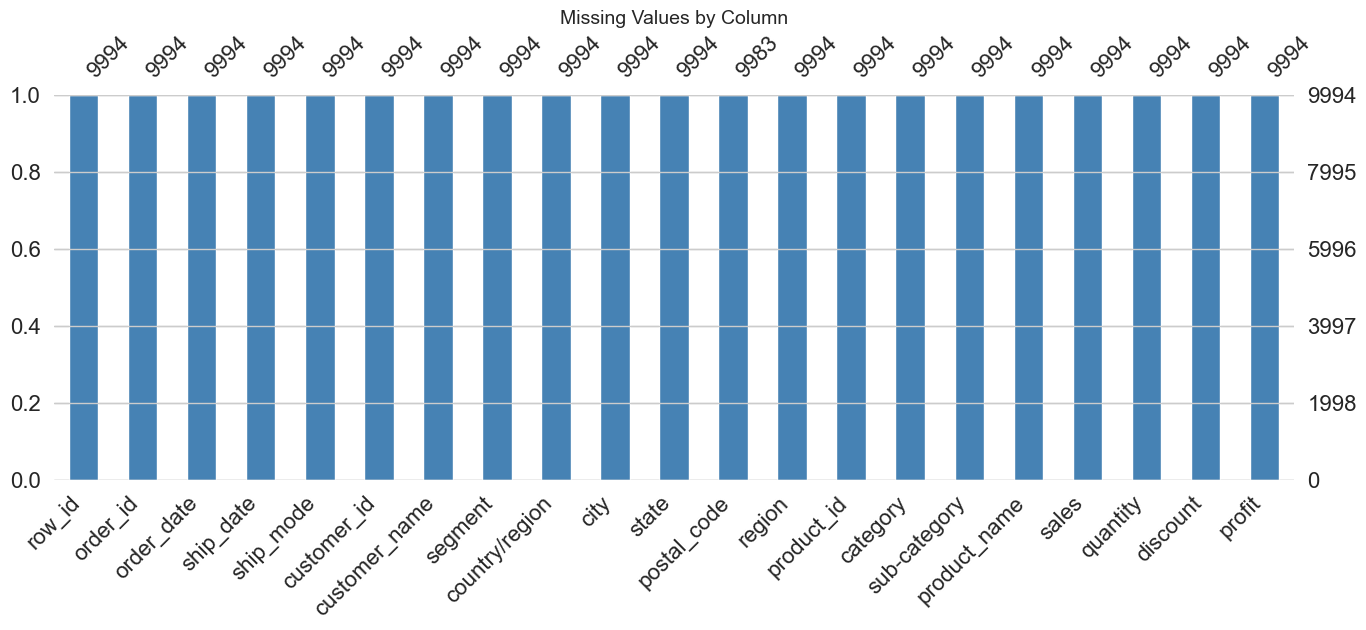

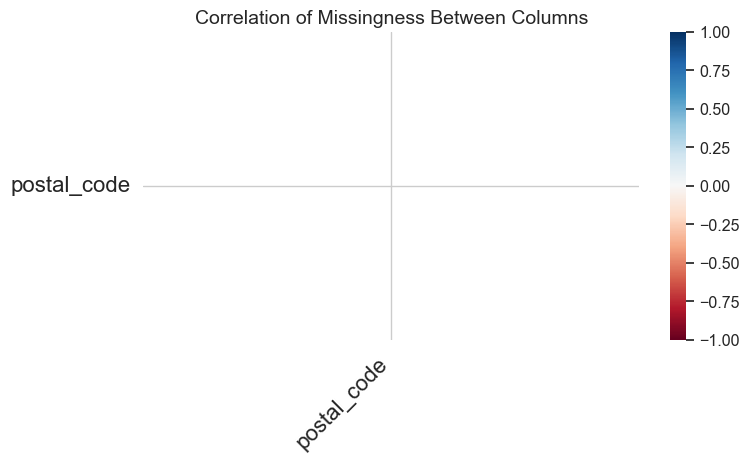

In [108]:
# Missingness summary
miss_summary = (
    current_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(current_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
display(miss_summary.sort_values("Number of Missing", ascending=False))

# Summarize missing count
msno.bar(current_df, figsize=(16, 5), color='steelblue')
plt.title("Missing Values by Column")
plt.show()

# Find missing pattern
msno.heatmap(current_df, figsize=(8, 4))
plt.title("Correlation of Missingness Between Columns")
plt.show()

In [109]:
# Find missing pattern
target_col = []
group_col = []
for col in group_col:
    na_rate = current_df.groupby(col)[target_col].apply(lambda x: x.isna().mean())
    #print("\n")
    #print(na_rate)

    plt.figure(figsize=(min(16, 2 + 0.5*na_rate.shape[0]), 0.5*na_rate.shape[0] + 2))
    sns.heatmap(na_rate, annot=True, fmt=".1%", cmap="YlOrRd", cbar=True)
    plt.title(f"Missing-rate heatmap by `{col}`")
    plt.xlabel("Target numeric columns")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Handle Missing Columns

In [110]:
# Median imputation for numerical columns by group
target_col = []             # Apply one column at a time
group_col = []              # Grouping columns to calculate median
imputation_method = 'mean'  # Options: 'mode', 'mean', 'median'

if len(target_col) == 0 or len(group_col) == 0:
    print("ℹ️ target_col and group_col are empty — no replacements applied.")
else:
    for col in target_col:
        if col not in current_df.columns:
            print(f"❌ Column '{col}' not found — skipping.")
        else:
            # Select imputation method
            if imputation_method == 'mode':
                imputed_series = current_df.groupby(group_col, dropna=True, observed=True)[col].transform(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)
            elif imputation_method == 'mean':
                imputed_series = current_df.groupby(group_col, dropna=True, observed=True)[col].transform('mean')
            elif imputation_method == 'median':
                imputed_series = current_df.groupby(group_col, dropna=True, observed=True)[col].transform('median')
            else:
                print("⚠️ Invalid imputation_method. Choose from 'mode', 'mean', or 'median'.")
                break

            # --- Create new imputed column ---
            out_col = f"{col}_imputed"
            current_df[out_col] = current_df[col].fillna(imputed_series)

            # --- Report results ---
            before = int(current_df[col].isna().sum())
            after  = int(current_df[out_col].isna().sum())
            print(f"✅ '{col}' imputed using {imputation_method} per group ({', '.join(group_col)}).")
            print(f"   Missing before: {before}, after: {after}")
                

ℹ️ target_col and group_col are empty — no replacements applied.


In [111]:
# Overwrite original column with imputed values if needed
for col in target_col:
    out_col = f"{col}_imputed"
    if out_col in current_df.columns:
        current_df[col] = current_df[out_col]
        current_df.drop(columns=[out_col], inplace=True)
        print(f"✅ Overwrote '{col}' with imputed values and dropped '{out_col}'.")

In [ ]:
# Missingness summary
miss_summary = (
    current_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(current_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
display(miss_summary.sort_values("Number of Missing", ascending=False))

## Outlier Detection
Outliers are identified by IQR because IQR method is robust to outliers. In real world, data is commonly non-normal and skewed, making z-score methods less precise in detecting outliers.
This cell analyzes `current_df` (DataFrame 1) for:
- Outlier detection using both IQR (1.5*IQR)
- Visual diagnostics: boxplots + pairwise scatter vs target-like numeric columns.

Number of outliers detected by IQR:
          IQR Outliers
profit            1881
sales             1167
discount           856
quantity           170
--------------------------------------------------


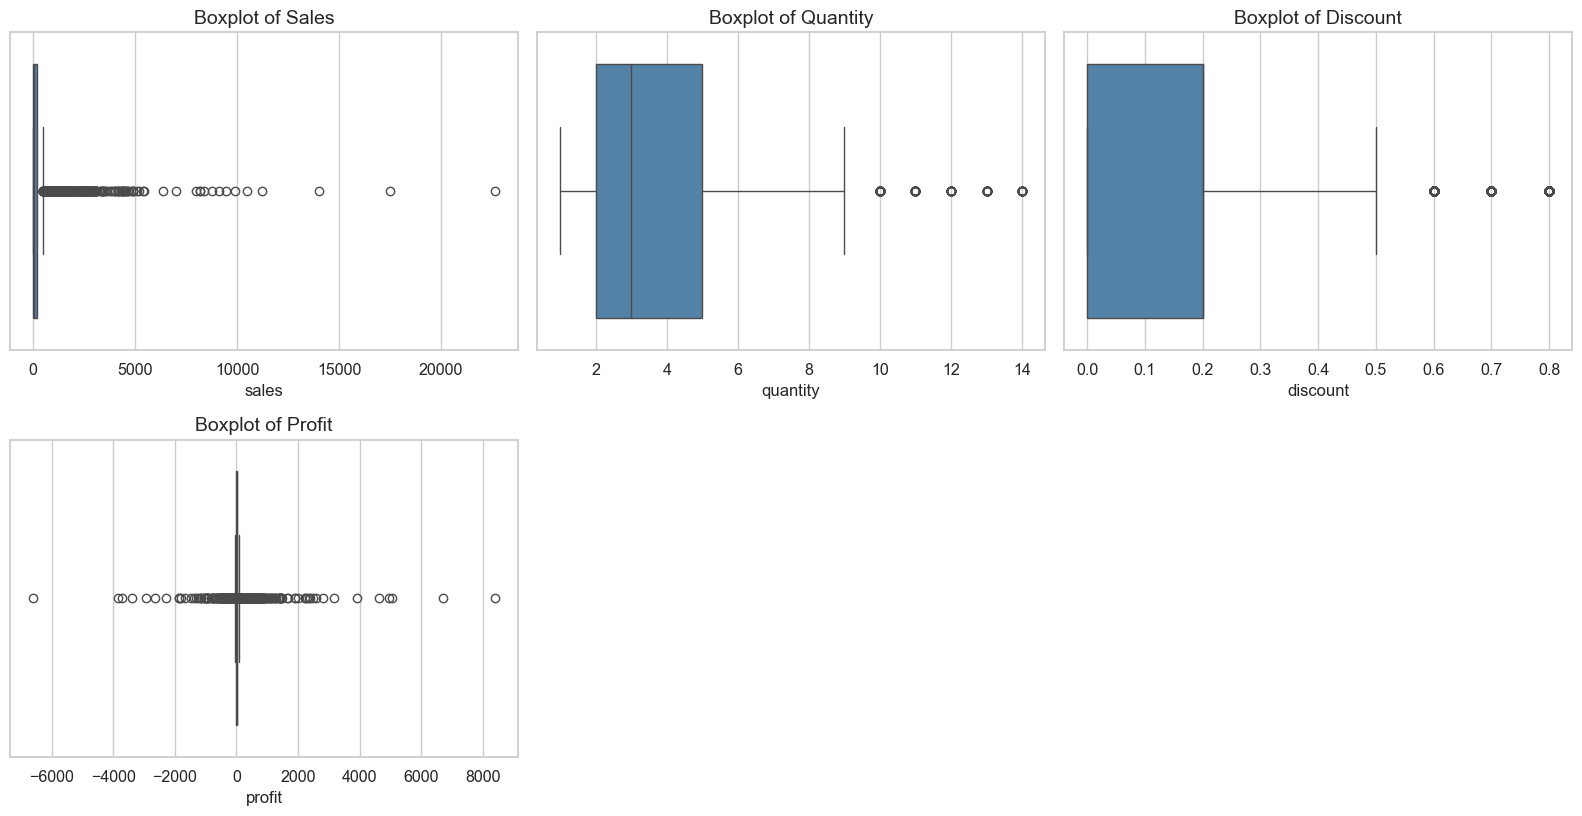

In [112]:
# OUTLIER DETECTION
# Calculate IQR for numerical columns
Q1 = current_df[numerical_cols].quantile(0.25)
Q3 = current_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outlier_condition = (current_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (current_df[numerical_cols] > (Q3 + 1.5 * IQR))
outliers_iqr = (outlier_condition).sum()
outliers_iqr = outliers_iqr.rename("IQR Outliers").to_frame().sort_values(by="IQR Outliers", ascending=False)
print("Number of outliers detected by IQR:")
print(outliers_iqr)
print('-'*50)

# Outlier marking columns if outliers exists
for col in numerical_cols:
    if outliers_iqr.loc[col, "IQR Outliers"] > 0:
        current_df[f'{col}_outlier'] = outlier_condition[col]

# Visualize distributions with boxplots

plt.figure(figsize=(min(16, 4*len(numerical_cols)), 4*len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):

    # Capitalize column names for display
    col_display = str.capitalize(col)
    
    plt.subplot(len(numerical_cols), 3, i)
    sns.boxplot(x=current_df[col], color='steelblue')
    plt.title(f'Boxplot of {col_display}')
plt.tight_layout()
plt.show()

## Export Data

In [119]:
#Drop redundant columns containing outlier flags if any
outlier_flag_cols = [col for col in current_df.columns if 'outlier' in col.lower()]
for col in outlier_flag_cols:
    current_df.drop(columns=[col], inplace=True)
    print(f"✅ Dropped outlier flag column: {col}")
    
# Overwrite original dataframe with current dataframe
superstore_df = current_df.copy()
print("✅ Overwrote 'superstore_df' with current dataframe.")


# Export Data
superstore_df.to_csv('superstore_data_cleaned.csv', index=False)


✅ Dropped outlier flag column: sales_outlier
✅ Dropped outlier flag column: quantity_outlier
✅ Dropped outlier flag column: discount_outlier
✅ Dropped outlier flag column: profit_outlier
✅ Overwrote 'superstore_df' with current dataframe.
